# this notebook is for Week5-Assignment-all figures
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# assignment:Make a plot of phi vs time and psi vs time.
# Make a free energy surface in phi, psi space from this data. In otherwords, compute a 2d histogram of the phi, psi data and plot the -log(histogram), nicely labeled, with a colorbar, etc
# Make a free energy surface for T=300 using the data in T=300. Do you now see the whole surface? Set the maximum free energy to 10 kT
# Plot how each replica is moving in temperature in replica_temp (you may have to do every 100 frame to see what's happening) and make sure it goes up and down
# Using 'gmx_mpi energy', calculate the potential energy in each replica. Compute a histogram of energy in each case, and plot all the histograms on the same plot. Do they overlap well?

In [14]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# load the trajectory from ../Data
trr_file = '../Data/adp.trr'
gro_file = '../Data/adp.gro'
traj = md.load(trr_file, top=gro_file)
# check the trajectory
print(traj)
# shape of trajtime
print(traj.time.shape)

<mdtraj.Trajectory with 5001 frames, 22 atoms, 3 residues, and unitcells>
(5001,)


In [31]:
# compute phi and psi angles
phi = md.compute_phi(traj, periodic=True)
psi = md.compute_psi(traj, periodic=True)
# check the returned values
print("phi[0]\n",phi[0])
print("phi[0],shape\n",phi[0].shape)
print("phi[1].shape\n",phi[1].shape)
# only get first coloumn of phi[1]
print("phi[1][:,0].shape\n",psi[1][:,0].shape)
print("phi[1].flatten().shape\n",phi[1].flatten().shape)

phi[0]
 [[ 4  6  8 14]]
phi[0],shape
 (1, 4)
phi[1].shape
 (5001, 1)
phi[1][:,0].shape
 (5001,)
phi[1].flatten().shape
 (5001,)


# mdtraj.compute_phi/psi returns: 1. indices of atoms (phi[0]); 2. dihedral angles in each frame (phi[1])
# 1. For phi[0], the shape is (n_phi, 4), because for each dihedral angle, 4 atoms (i.e. 2 planes) are needed to determine it.
# phi[0] would return like
[index1-1 index2-1 index3-1 index4-1] # this combination determins first angle
[index1-2 index2-2 index3-2 index4-2] # second angle
...
# In this case, there's only one dihedral angle value which is determined by atom 4/6/8/14

# 2. For phi[1], the shape is (n_frames, n_phi), like
[angle1 angle2 angle3 ... angleN] # in first frame
[angle1' angle2' angle3' ... angleN'] # in second frame
...
# In this case, there are 5001 frames, and each contains one angle.

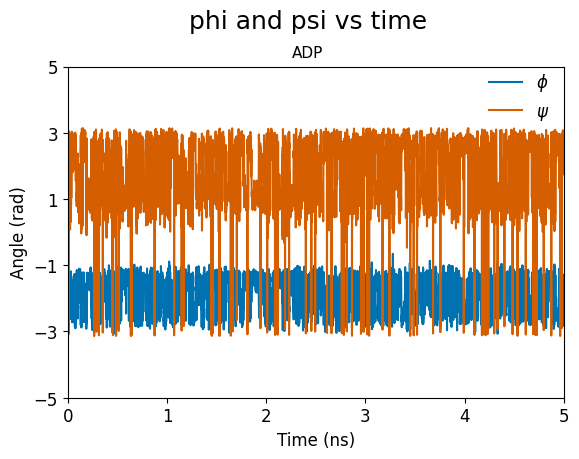

In [337]:
# figure 1: phi & psi over time
fig=plt.figure(1)
# plot phi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, phi[1][:,0], color='#0072B2')
# plot psi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, psi[1][:,0], color='#D55E00')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('Angle (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="phi and psi vs time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set the legend, fontsize = 12, location = upper right, frameon = False, shift the legend box up
plt.legend(['$\phi$', '$\psi$'], fontsize=12, loc='upper right', frameon=False, bbox_to_anchor=(1.0, 1.03))
# set limits for the axes
plt.xlim(0,5)
plt.ylim(-5,5)
plt.yticks(np.arange(-5,5.1,2))
# save figure as pdf in ../Figures
fname = '../Figures/fig.1-[adp]phi_psi_vs_time.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.15
stable state 2 : [-1.44513262] [1.19380521]
free energy: 0.00


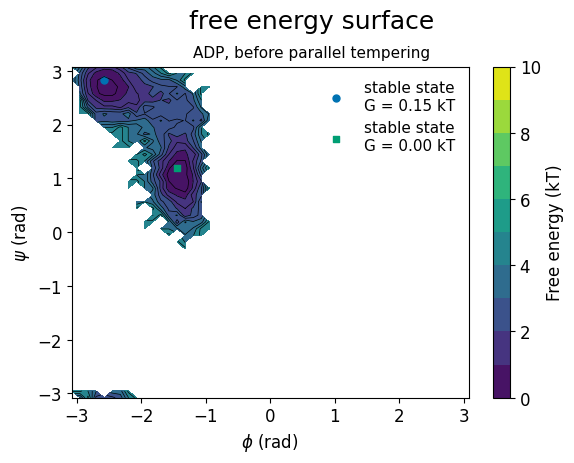

In [32]:
# figure 2: free energy surface-original data
fig=plt.figure(2)

# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]], density=True)
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10    

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, before parallel tempering", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT', )
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures
fname = '../Figures/fig.2-[adp]free_energy_surface.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.00
stable state 2 : [-1.31946891] [1.0681415]
free energy: 0.00
stable state 3 : [1.0681415] [-0.9424778]
free energy: 2.83


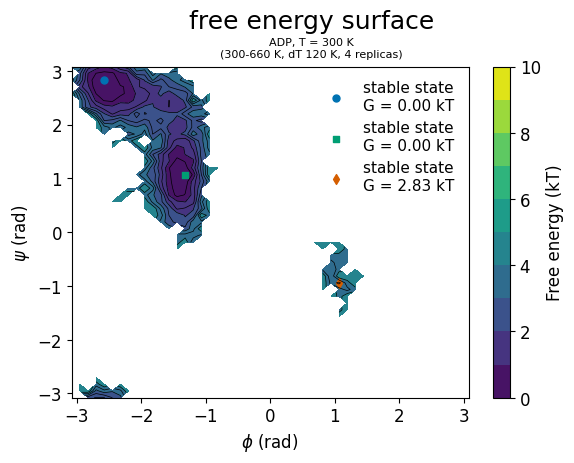

In [28]:
# preparation for figure 3: free energy surface-T300K-attempt5
# load trajectory data
trr_file = '../Data/attempt_5_300_660_dT120/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_5_300_660_dT120/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]],density=True)
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K\n(300-660 K, dT 120 K, 4 replicas)", fontsize=8, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures
fname = '../Figures/fig.3-[300K]free_energy_surface_parallel_tempering.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



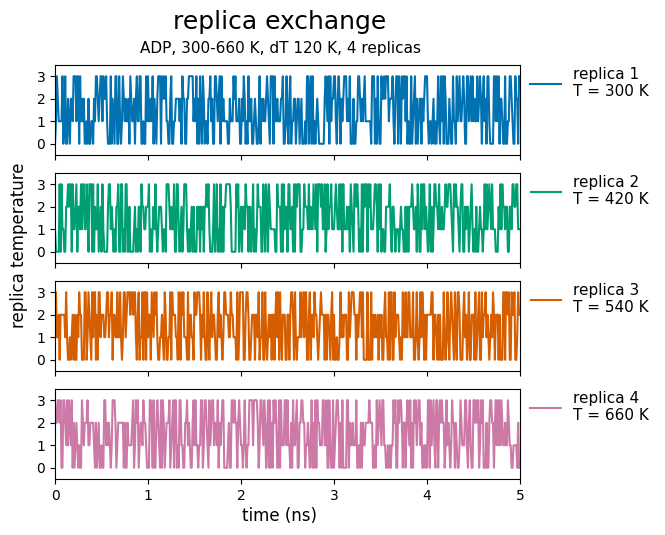

In [88]:
# preparation for figure 4: replica exchange
#Plot how each replica is moving in temperature in replica_temp 
# (you may have to do every 100 frame to see what's happening) and make sure it goes up and down
# load xvg file
xvg_file = '../Data/attempt_5_300_660_dT120/replica_temp.xvg'
xvg = np.loadtxt(xvg_file, skiprows=0)
# scale the time to ns
xvg[:,0] = xvg[:,0]/1000
# figure 4: replica exchange
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex=True,sharey=True,figsize=(6,6))

# plot replica exchange
# plot replica 1, every 100 row, in ns, colorblind-friendly, label
ax1.plot(xvg[::100,0], xvg[::100,1], color='#0072B2', label='replica 1\nT = 300 K')
# subplot legend, fontsize = 11, relocate to the right
ax1.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 2, every 100 row, in ns, colorblind-friendly, label
ax2.plot(xvg[::100,0], xvg[::100,2], color='#009E73', label='replica 2\nT = 420 K')
# subplot legend, fontsize = 11, relocate to the right
ax2.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 3, every 100 row, in ns, colorblind-friendly, label
ax3.plot(xvg[::100,0], xvg[::100,3], color='#D55E00', label='replica 3\nT = 540 K')
# subplot legend, fontsize = 11, relocate to the right
ax3.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 4, every 100 row, in ns, colorblind-friendly, label
ax4.plot(xvg[::100,0], xvg[::100,4], color='#CC79A7', label='replica 4\nT = 660 K')
# subplot legend, fontsize = 11, relocate to the right
ax4.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)

# set limits for all subplots
plt.xlim(0, 5)
plt.ylim(-0.5, 3.5)
# set y ticks, fontsize = 12
plt.yticks(np.arange(0, 4, 1))

# labels & title
# y label
plt.text(x=0.05, y=0.5, s="replica temperature", fontsize=12, va="center", rotation=90, transform=fig.transFigure)
# x label
plt.text(x=0.5, y=0.04, s="time (ns)", fontsize=12, ha="center", transform=fig.transFigure)
# two lines of title
plt.text(x=0.5, y=0.86, s="replica exchange", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 300-660 K, dT 120 K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig.4-[300-660K]replica_exchange.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


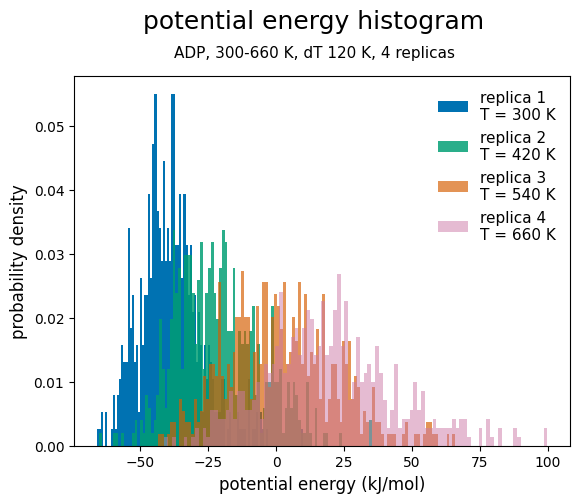

In [90]:
# preparation for figure 5: potential energy histogram
# xvg file range
xvgs = ('../Data/attempt_5_300_660_dT120/T300/adp_exchange4temps.xvg',
        '../Data/attempt_5_300_660_dT120/T420/adp_exchange4temps.xvg', 
        '../Data/attempt_5_300_660_dT120/T540/adp_exchange4temps.xvg',
        '../Data/attempt_5_300_660_dT120/T660/adp_exchange4temps.xvg')
# generate empty array for potential energy, length = len(xvgs)
PE = np.empty(len(xvgs), dtype=object)
# load potential energy  
for i in range(4):
    xvg = np.loadtxt(xvgs[i], skiprows=24)
    PE[i]= xvg[:,1]
    i += 1
# alpha pool
alphas = np.linspace(1, 0.5, 4)



# figure 5: potential energy histogram
fig = plt.figure(5)
# plot potential energy histogram
# plot replica 1, colorblind-friendly, label
plt.hist(PE[0], bins=100, color='#0072B2', label='replica 1\nT = 300 K', alpha=alphas[0], density=True)
# plot replica 2, colorblind-friendly, label
plt.hist(PE[1], bins=100, color='#009E73', label='replica 2\nT = 420 K', alpha=alphas[1], density=True)
# plot replica 3, colorblind-friendly, label
plt.hist(PE[2], bins=100, color='#D55E00', label='replica 3\nT = 540 K', alpha=alphas[2], density=True)
# plot replica 4, colorblind-friendly, label
plt.hist(PE[3], bins=100, color='#CC79A7', label='replica 4\nT = 660 K', alpha=alphas[3], density=True)
# legend, fontsize = 11, relocate to the right
plt.legend(loc='upper right', fontsize=11, frameon=False)
#bbox_to_anchor=(1.15, 0.8)

# labels & title
plt.xlabel('potential energy (kJ/mol)', fontsize=12)
plt.ylabel('probability density', fontsize=12)
plt.text(x=0.5, y=0.98, s="potential energy histogram", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "ADP, 300-660 K, dT 120 K, 4 replicas", fontsize=11, ha="center", transform=fig.transFigure)

# save figure as pdf in ../Figures
fname = '../Figures/fig.5-[300-660K]potential_energy_histogram.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

the next parts are not for homework
analysis of attempt_9_[300-540K, dT=40K, 7 replicas]

0.0 1.3169120049493976
0.0 inf


c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == "":


stable state 1 : [-2.57610598] [2.70176968]
free energy: 0.04
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00
stable state 3 : [1.0681415] [-0.9424778]
free energy: 2.56


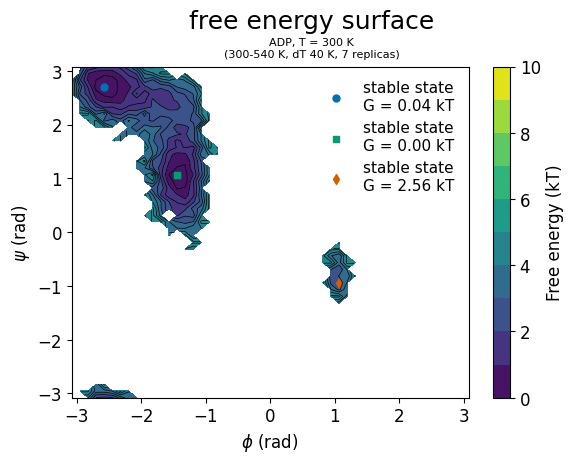

In [13]:
# preparation for figure 3: free energy surface-T300K-attempt9
# load trajectory data
trr_file = '../Data/attempt_9_300_540_dT40_7T/T300/adp_exchange7temps.trr'
gro_file = '../Data/attempt_9_300_540_dT40_7T/T300/adp_exchange7temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize, lognorm
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]],normed=True)
print(H.min(),H.max())
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10
print(F.min(), F.max())

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K\n(300-540 K, dT 40 K, 7 replicas)", fontsize=8, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

# save figure as pdf in ../Figures
#fname = '../Figures/fig.3-[300K]free_energy_surface_parallel_tempering.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



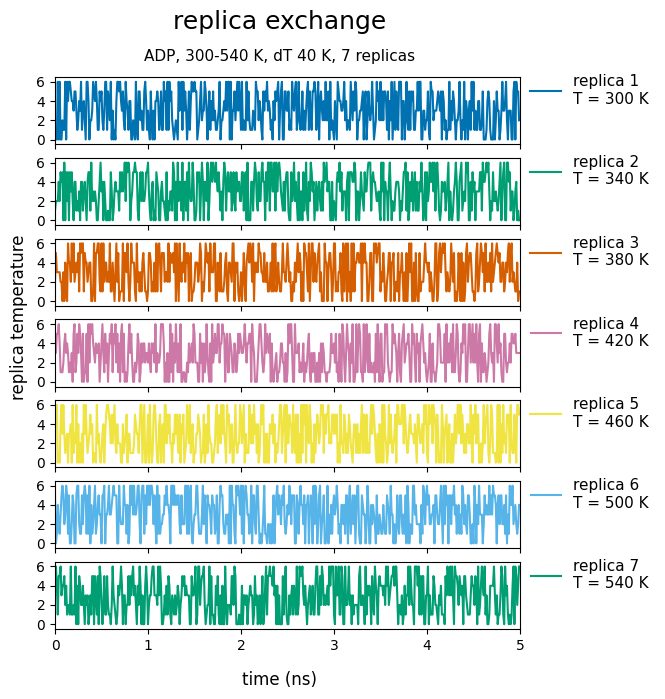

In [89]:
# preparation for figure 4: replica exchange-attempt9
#Plot how each replica is moving in temperature in replica_temp 
# (you may have to do every 100 frame to see what's happening) and make sure it goes up and down
# load xvg file
xvg_file = '../Data/attempt_9_300_540_dT40_7T/replica_temp.xvg'
xvg = np.loadtxt(xvg_file, skiprows=0)
# scale the time to ns
xvg[:,0] = xvg[:,0]/1000
# figure 4: replica exchange-attempt9
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,sharex=True,sharey=True,figsize=(6,8))

# plot replica exchange
# plot replica 1, every 100 row, in ns, colorblind-friendly, label
ax1.plot(xvg[::100,0], xvg[::100,1], color='#0072B2', label='replica 1\nT = 300 K')
# subplot legend, fontsize = 11, relocate to the right
ax1.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 2, every 100 row, in ns, colorblind-friendly, label
ax2.plot(xvg[::100,0], xvg[::100,2], color='#009E73', label='replica 2\nT = 340 K')
# subplot legend, fontsize = 11, relocate to the right
ax2.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 3, every 100 row, in ns, colorblind-friendly, label
ax3.plot(xvg[::100,0], xvg[::100,3], color='#D55E00', label='replica 3\nT = 380 K')
# subplot legend, fontsize = 11, relocate to the right
ax3.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 4, every 100 row, in ns, colorblind-friendly, label
ax4.plot(xvg[::100,0], xvg[::100,4], color='#CC79A7', label='replica 4\nT = 420 K')
# subplot legend, fontsize = 11, relocate to the right
ax4.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 5, every 100 row, in ns, colorblind-friendly, label
ax5.plot(xvg[::100,0], xvg[::100,5], color='#F0E442', label='replica 5\nT = 460 K')
# subplot legend, fontsize = 11, relocate to the right
ax5.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 6, every 100 row, in ns, colorblind-friendly, label
ax6.plot(xvg[::100,0], xvg[::100,6], color='#56B4E9', label='replica 6\nT = 500 K')
# subplot legend, fontsize = 11, relocate to the right
ax6.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 7, every 100 row, in ns, colorblind-friendly, label
ax7.plot(xvg[::100,0], xvg[::100,7], color='#009E73', label='replica 7\nT = 540 K')
# subplot legend, fontsize = 11, relocate to the right
ax7.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)


# set limits for all subplots
plt.xlim(0, 5)
plt.ylim(-0.5, 6.5)
# set y ticks, fontsize = 12
plt.yticks(np.arange(0, 7, 2))

# labels & title
# y label
plt.text(x=0.05, y=0.5, s="replica temperature", fontsize=12, va="center", rotation=90, transform=fig.transFigure)
# x label
plt.text(x=0.5, y=0.04, s="time (ns)", fontsize=12, ha="center", transform=fig.transFigure)
# two lines of title
plt.text(x=0.5, y=0.86, s="replica exchange", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 300-540 K, dT 40 K, 7 replicas", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
#fname = '../Figures/fig.4-[300-660K]replica_exchange.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


Text(-2.4713611796407187, 0.06, '7')

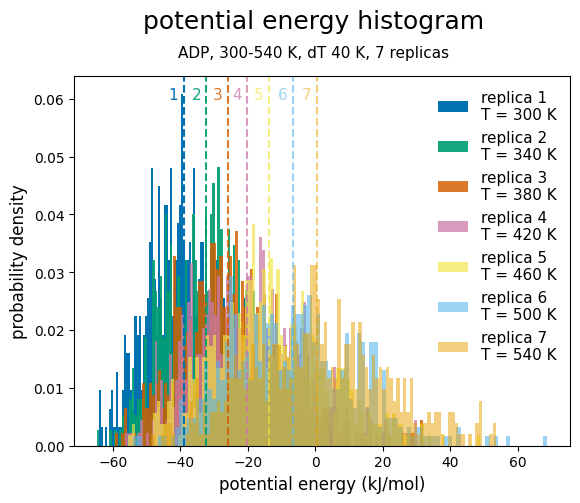

In [108]:
# preparation for figure 5: potential energy histogram-attempt9
# xvg file range
xvgs = ('../Data/attempt_9_300_540_dT40_7T/T300/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T340/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T380/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T420/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T460/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T500/adp_exchange7temps.xvg',
        '../Data/attempt_9_300_540_dT40_7T/T540/adp_exchange7temps.xvg')
# generate empty array for potential energy, length = len(xvgs)
PE = np.empty(len(xvgs), dtype=object)
# load potential energy  
for i in range(7):
    xvg = np.loadtxt(xvgs[i], skiprows=24)
    PE[i]= xvg[:,1]
    i += 1
# alpha pool
alphas = np.linspace(1, 0.5, 7)



# figure 5: potential energy histogram-attempt9
fig = plt.figure(5)
# plot potential energy histogram
# plot replica 1, colorblind-friendly, label
plt.hist(PE[0], bins=100, color='#0072B2', label='replica 1\nT = 300 K', alpha=alphas[0], density=True)
# plot replica 2, colorblind-friendly, label
plt.hist(PE[1], bins=100, color='#009E73', label='replica 2\nT = 340 K', alpha=alphas[1], density=True)
# plot replica 3, colorblind-friendly, label
plt.hist(PE[2], bins=100, color='#D55E00', label='replica 3\nT = 380 K', alpha=alphas[2], density=True)
# plot replica 4, colorblind-friendly, label
plt.hist(PE[3], bins=100, color='#CC79A7', label='replica 4\nT = 420 K', alpha=alphas[3], density=True)
# plot replica 5, colorblind-friendly, label
plt.hist(PE[4], bins=100, color='#F0E442', label='replica 5\nT = 460 K', alpha=alphas[4], density=True)
# plot replica 6, colorblind-friendly, label
plt.hist(PE[5], bins=100, color='#56B4E9', label='replica 6\nT = 500 K', alpha=alphas[5], density=True)
# plot replica 7, colorblind-friendly, label
plt.hist(PE[6], bins=100, color='#E69F00', label='replica 7\nT = 540 K', alpha=alphas[6], density=True)
# legend, fontsize = 11, relocate to the right
plt.legend(loc='upper right', fontsize=11, frameon=False)
#bbox_to_anchor=(1.15, 0.8)


# labels & title
plt.xlabel('potential energy (kJ/mol)', fontsize=12)
plt.ylabel('probability density', fontsize=12)
plt.text(x=0.5, y=0.98, s="potential energy histogram", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "ADP, 300-540 K, dT 40 K, 7 replicas", fontsize=11, ha="center", transform=fig.transFigure)

# add lines to show shift of potential energy and label each line with replica index
# line 1
plt.axvline(x=PE[0].mean(), color='#0072B2', linestyle='--', alpha=alphas[0])
plt.text(x=PE[0].mean()-3, y=0.06, s='1', fontsize=11, color='#0072B2', alpha=alphas[0], ha='center')
# line 2
plt.axvline(x=PE[1].mean(), color='#009E73', linestyle='--', alpha=alphas[1])
plt.text(x=PE[1].mean()-3, y=0.06, s='2', fontsize=11, color='#009E73', alpha=alphas[1], ha='center')
# line 3
plt.axvline(x=PE[2].mean(), color='#D55E00', linestyle='--', alpha=alphas[2])
plt.text(x=PE[2].mean()-3, y=0.06, s='3', fontsize=11, color='#D55E00', alpha=alphas[2], ha='center')
# line 4
plt.axvline(x=PE[3].mean(), color='#CC79A7', linestyle='--', alpha=alphas[3])
plt.text(x=PE[3].mean()-3, y=0.06, s='4', fontsize=11, color='#CC79A7', alpha=alphas[3], ha='center')
# line 5
plt.axvline(x=PE[4].mean(), color='#F0E442', linestyle='--', alpha=alphas[4])
plt.text(x=PE[4].mean()-3, y=0.06, s='5', fontsize=11, color='#F0E442', alpha=alphas[4], ha='center')
# line 6
plt.axvline(x=PE[5].mean(), color='#56B4E9', linestyle='--', alpha=alphas[5])
plt.text(x=PE[5].mean()-3, y=0.06, s='6', fontsize=11, color='#56B4E9', alpha=alphas[5], ha='center')
# line 7
plt.axvline(x=PE[6].mean(), color='#E69F00', linestyle='--', alpha=alphas[6])
plt.text(x=PE[6].mean()-3, y=0.06, s='7', fontsize=11, color='#E69F00', alpha=alphas[6], ha='center')

# save figure as pdf in ../Figures
#fname = '../Figures/fig.5-[300-660K]potential_energy_histogram.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')